# 6610450871 นายชนพัฒน์ โชติกุลรัตน์ หมู่ 200

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_excel('IndiaWeather.xlsx')
df

,อุณหภูมิ,ความชื้น,ปริมาณ PM2.5,ปริมาณ PM10,ปริมาณไนโตรเจน,ปริมาณซัลเฟอร์,ปริมาณคาร์บอน,ระยะห่างจากโรงงาน,ความหนาแน่นประชากร,คุณภาพอากาศ
0,24.7,53.8,2.1,8.7,25.1,21.8,0.88,10.0,310,ปานกลาง
1,25.8,65.6,12.7,18.5,12.3,26,1.02,0.0,297,ดี
2,26.6,55.2,26.6,39.1,?,25.8,0.54,0.6,316,ปานกลาง
3,24.3,63,2.5,13.8,15.9,3.7,1.3,6.6,270,แย่
4,23.3,73.2,19.9,37.2,17.1,19.6,1.15,1.7,319,ดี
...,...,...,...,...,...,...,...,...,...,...
495,27.3,59.5,65.7,73.5,18.5,9.6,0.51,0.2,290,ปานกลาง
496,22.5,58.6,46.4,57.8,10.7,27.6,1.13,4.1,293,ปานกลาง
497,24.4,?,31.5,40.2,12.5,2,0.66,0.3,264,ปานกลาง
498,19.2,50.7,56.8,65.6,14.1,13,0.45,6.4,322,ปานกลาง


In [141]:
df.isnull().sum()

อุณหภูมิ              0
ความชื้น              0
ปริมาณ PM2.5          0
ปริมาณ PM10           0
ปริมาณไนโตรเจน        0
ปริมาณซัลเฟอร์        0
ปริมาณคาร์บอน         0
ระยะห่างจากโรงงาน     0
ความหนาแน่นประชากร    0
คุณภาพอากาศ           0
dtype: int64

In [142]:
df.rename(columns = {'อุณหภูมิ' : 'temperature','ความชื้น' : 'Humidity','ปริมาณ PM2.5' : 'PM2.5','ปริมาณ PM10' : 'PM10','ปริมาณไนโตรเจน':'NO2','ปริมาณซัลเฟอร์' : 'SO2','ปริมาณคาร์บอน': 'CO','ระยะห่างจากโรงงาน' : 'Distance_from_Industrial_Areas','ความหนาแน่นประชากร':'Population_Density','คุณภาพอากาศ' :'Air_Quality'}, inplace = True)
df

,temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Distance_from_Industrial_Areas,Population_Density,Air_Quality
0,24.7,53.8,2.1,8.7,25.1,21.8,0.88,10.0,310,ปานกลาง
1,25.8,65.6,12.7,18.5,12.3,26,1.02,0.0,297,ดี
2,26.6,55.2,26.6,39.1,?,25.8,0.54,0.6,316,ปานกลาง
3,24.3,63,2.5,13.8,15.9,3.7,1.3,6.6,270,แย่
4,23.3,73.2,19.9,37.2,17.1,19.6,1.15,1.7,319,ดี
...,...,...,...,...,...,...,...,...,...,...
495,27.3,59.5,65.7,73.5,18.5,9.6,0.51,0.2,290,ปานกลาง
496,22.5,58.6,46.4,57.8,10.7,27.6,1.13,4.1,293,ปานกลาง
497,24.4,?,31.5,40.2,12.5,2,0.66,0.3,264,ปานกลาง
498,19.2,50.7,56.8,65.6,14.1,13,0.45,6.4,322,ปานกลาง


In [143]:
df.Air_Quality.value_counts()

Air_Quality
ดี                  195
ปานกลาง             157
แย่                  99
อันตรายต่อสุขภาพ     49
Name: count, dtype: int64

In [144]:
df.replace('?', np.nan, inplace=True)
for col in df.columns[:-1]:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].astype(float)
        for label in df['Air_Quality'].unique():
            df.loc[(df['Air_Quality'] == label) & (df[col].isna()), col] = df[col].loc[df['Air_Quality'] == label].mean()

C:\Users\chona\AppData\Local\Temp\ipykernel_14188\4015729593.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   temperature                     500 non-null    float64
 1   Humidity                        500 non-null    float64
 2   PM2.5                           500 non-null    float64
 3   PM10                            500 non-null    float64
 4   NO2                             500 non-null    float64
 5   SO2                             500 non-null    float64
 6   CO                              500 non-null    float64
 7   Distance_from_Industrial_Areas  500 non-null    float64
 8   Population_Density              500 non-null    float64
 9   Air_Quality                     500 non-null    object 
dtypes: float64(9), object(1)
memory usage: 39.2+ KB


In [146]:
pm25_bins = [0, 38, 51, 91, np.inf]
pm25_labels = ['ดี', 'ปานกลาง', 'แย่', 'อันตรายต่อสุขภาพ']
pm25_filtered = pd.cut(df['PM2.5'], bins=pm25_bins, labels=pm25_labels, right=False)
df = df[pm25_filtered == df['Air_Quality']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 1 to 496
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   temperature                     177 non-null    float64
 1   Humidity                        177 non-null    float64
 2   PM2.5                           177 non-null    float64
 3   PM10                            177 non-null    float64
 4   NO2                             177 non-null    float64
 5   SO2                             177 non-null    float64
 6   CO                              177 non-null    float64
 7   Distance_from_Industrial_Areas  177 non-null    float64
 8   Population_Density              177 non-null    float64
 9   Air_Quality                     177 non-null    object 
dtypes: float64(9), object(1)
memory usage: 15.2+ KB


In [147]:
MOLAR_VOLUME = 24.45
MW_NO2 = 46.01  
MW_SO2 = 64.07  
MW_CO = 28.01  
def ppb_to_ugm3(ppb, molecular_weight):
    ugm3 = (ppb * molecular_weight * 1e-3) / MOLAR_VOLUME 
    return ugm3

def ppm_to_ugm3(ppm, molecular_weight):
     ugm3 = (ppm * molecular_weight) / MOLAR_VOLUME
     return ugm3

In [148]:
df['NO2'] = ppm_to_ugm3(df['NO2'], MW_NO2)
df['SO2'] = ppm_to_ugm3(df['SO2'], MW_SO2)
df['CO'] = ppm_to_ugm3(df['CO'], MW_CO)


C:\Users\chona\AppData\Local\Temp\ipykernel_14188\473470235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NO2'] = ppm_to_ugm3(df['NO2'], MW_NO2)
C:\Users\chona\AppData\Local\Temp\ipykernel_14188\473470235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SO2'] = ppm_to_ugm3(df['SO2'], MW_SO2)
C:\Users\chona\AppData\Local\Temp\ipykernel_14188\473470235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [149]:
df.Air_Quality.value_counts()

Air_Quality
ดี                  146
ปานกลาง              14
แย่                  14
อันตรายต่อสุขภาพ      3
Name: count, dtype: int64

In [150]:
le = LabelEncoder()
df['Air_Quality'] = le.fit_transform(df['Air_Quality'])

X = df.drop('Air_Quality', axis=1)
y = df['Air_Quality']

scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\chona\AppData\Local\Temp\ipykernel_14188\2711982606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Air_Quality'] = le.fit_transform(df['Air_Quality'])


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [152]:
grid_params = {
    'n_neighbors': list(range(1,100)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}


gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=3, cv=10, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)
knn = gs_results.best_estimator_

c:\Users\chona\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 1584 candidates, totalling 15840 fits


In [153]:
knn

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [154]:
y_pred = knn.predict(X_test)

In [155]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9166666666666666


In [156]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.50      0.50      0.50         2
           2       0.00      0.00      0.00         1
           3       0.50      0.50      0.50         2

    accuracy                           0.92        36
   macro avg       0.49      0.50      0.50        36
weighted avg       0.89      0.92      0.90        36



c:\Users\chona\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chona\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\chona\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


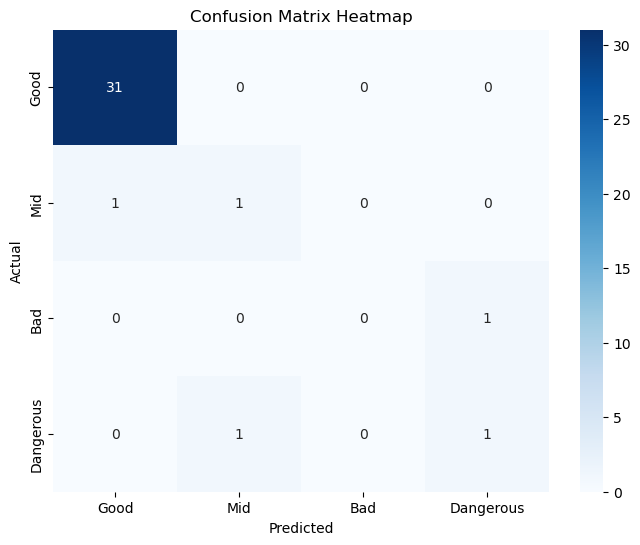

In [157]:
cm = confusion_matrix(y_test, y_pred)
# class_labels = le.classes_ 
class_labels = ['Good', 'Mid', 'Bad', 'Dangerous']


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()